In [1]:
!nvidia-smi

Sun Dec 15 05:47:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.8/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir '{HOME}/datasets'
DATA_DIR='/content/datasets'

In [6]:
!unzip "trash_detection.yolov8" -d "datasets"

Archive:  trash_detection.yolov8.zip
  inflating: datasets/README.dataset.txt  
  inflating: datasets/README.roboflow.txt  
  inflating: datasets/data.yaml      
   creating: datasets/train/
   creating: datasets/train/images/
 extracting: datasets/train/images/-18_png.rf.41f409f9ebeba44dd5d9ca35847c19f7.jpg  
 extracting: datasets/train/images/-18_png.rf.a6c5a543016cdedaac831bead7e95e68.jpg  
 extracting: datasets/train/images/-18_png.rf.fa899989c8654bf668ee5b3fb9f7b428.jpg  
 extracting: datasets/train/images/-19_jpg.rf.311886f855062d989269535383f9916c.jpg  
 extracting: datasets/train/images/-19_jpg.rf.40a4a2deb4d9b8da32b4cf5b6a2ba358.jpg  
 extracting: datasets/train/images/-19_jpg.rf.ce27d156a8d2d9c545cf8206d75d05f9.jpg  
 extracting: datasets/train/images/-1_png.rf.666fd75d2740868e4e28aac53f194f35.jpg  
 extracting: datasets/train/images/-1_png.rf.8160eeb7576f275f298be8c06b54798a.jpg  
 extracting: datasets/train/images/-1_png.rf.c53768c7feb26eeb1203823c5180465c.jpg  
 extracting

In [8]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data='{DATA_DIR}/data.yaml' epochs=25 imgsz=640

/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:336: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # lo

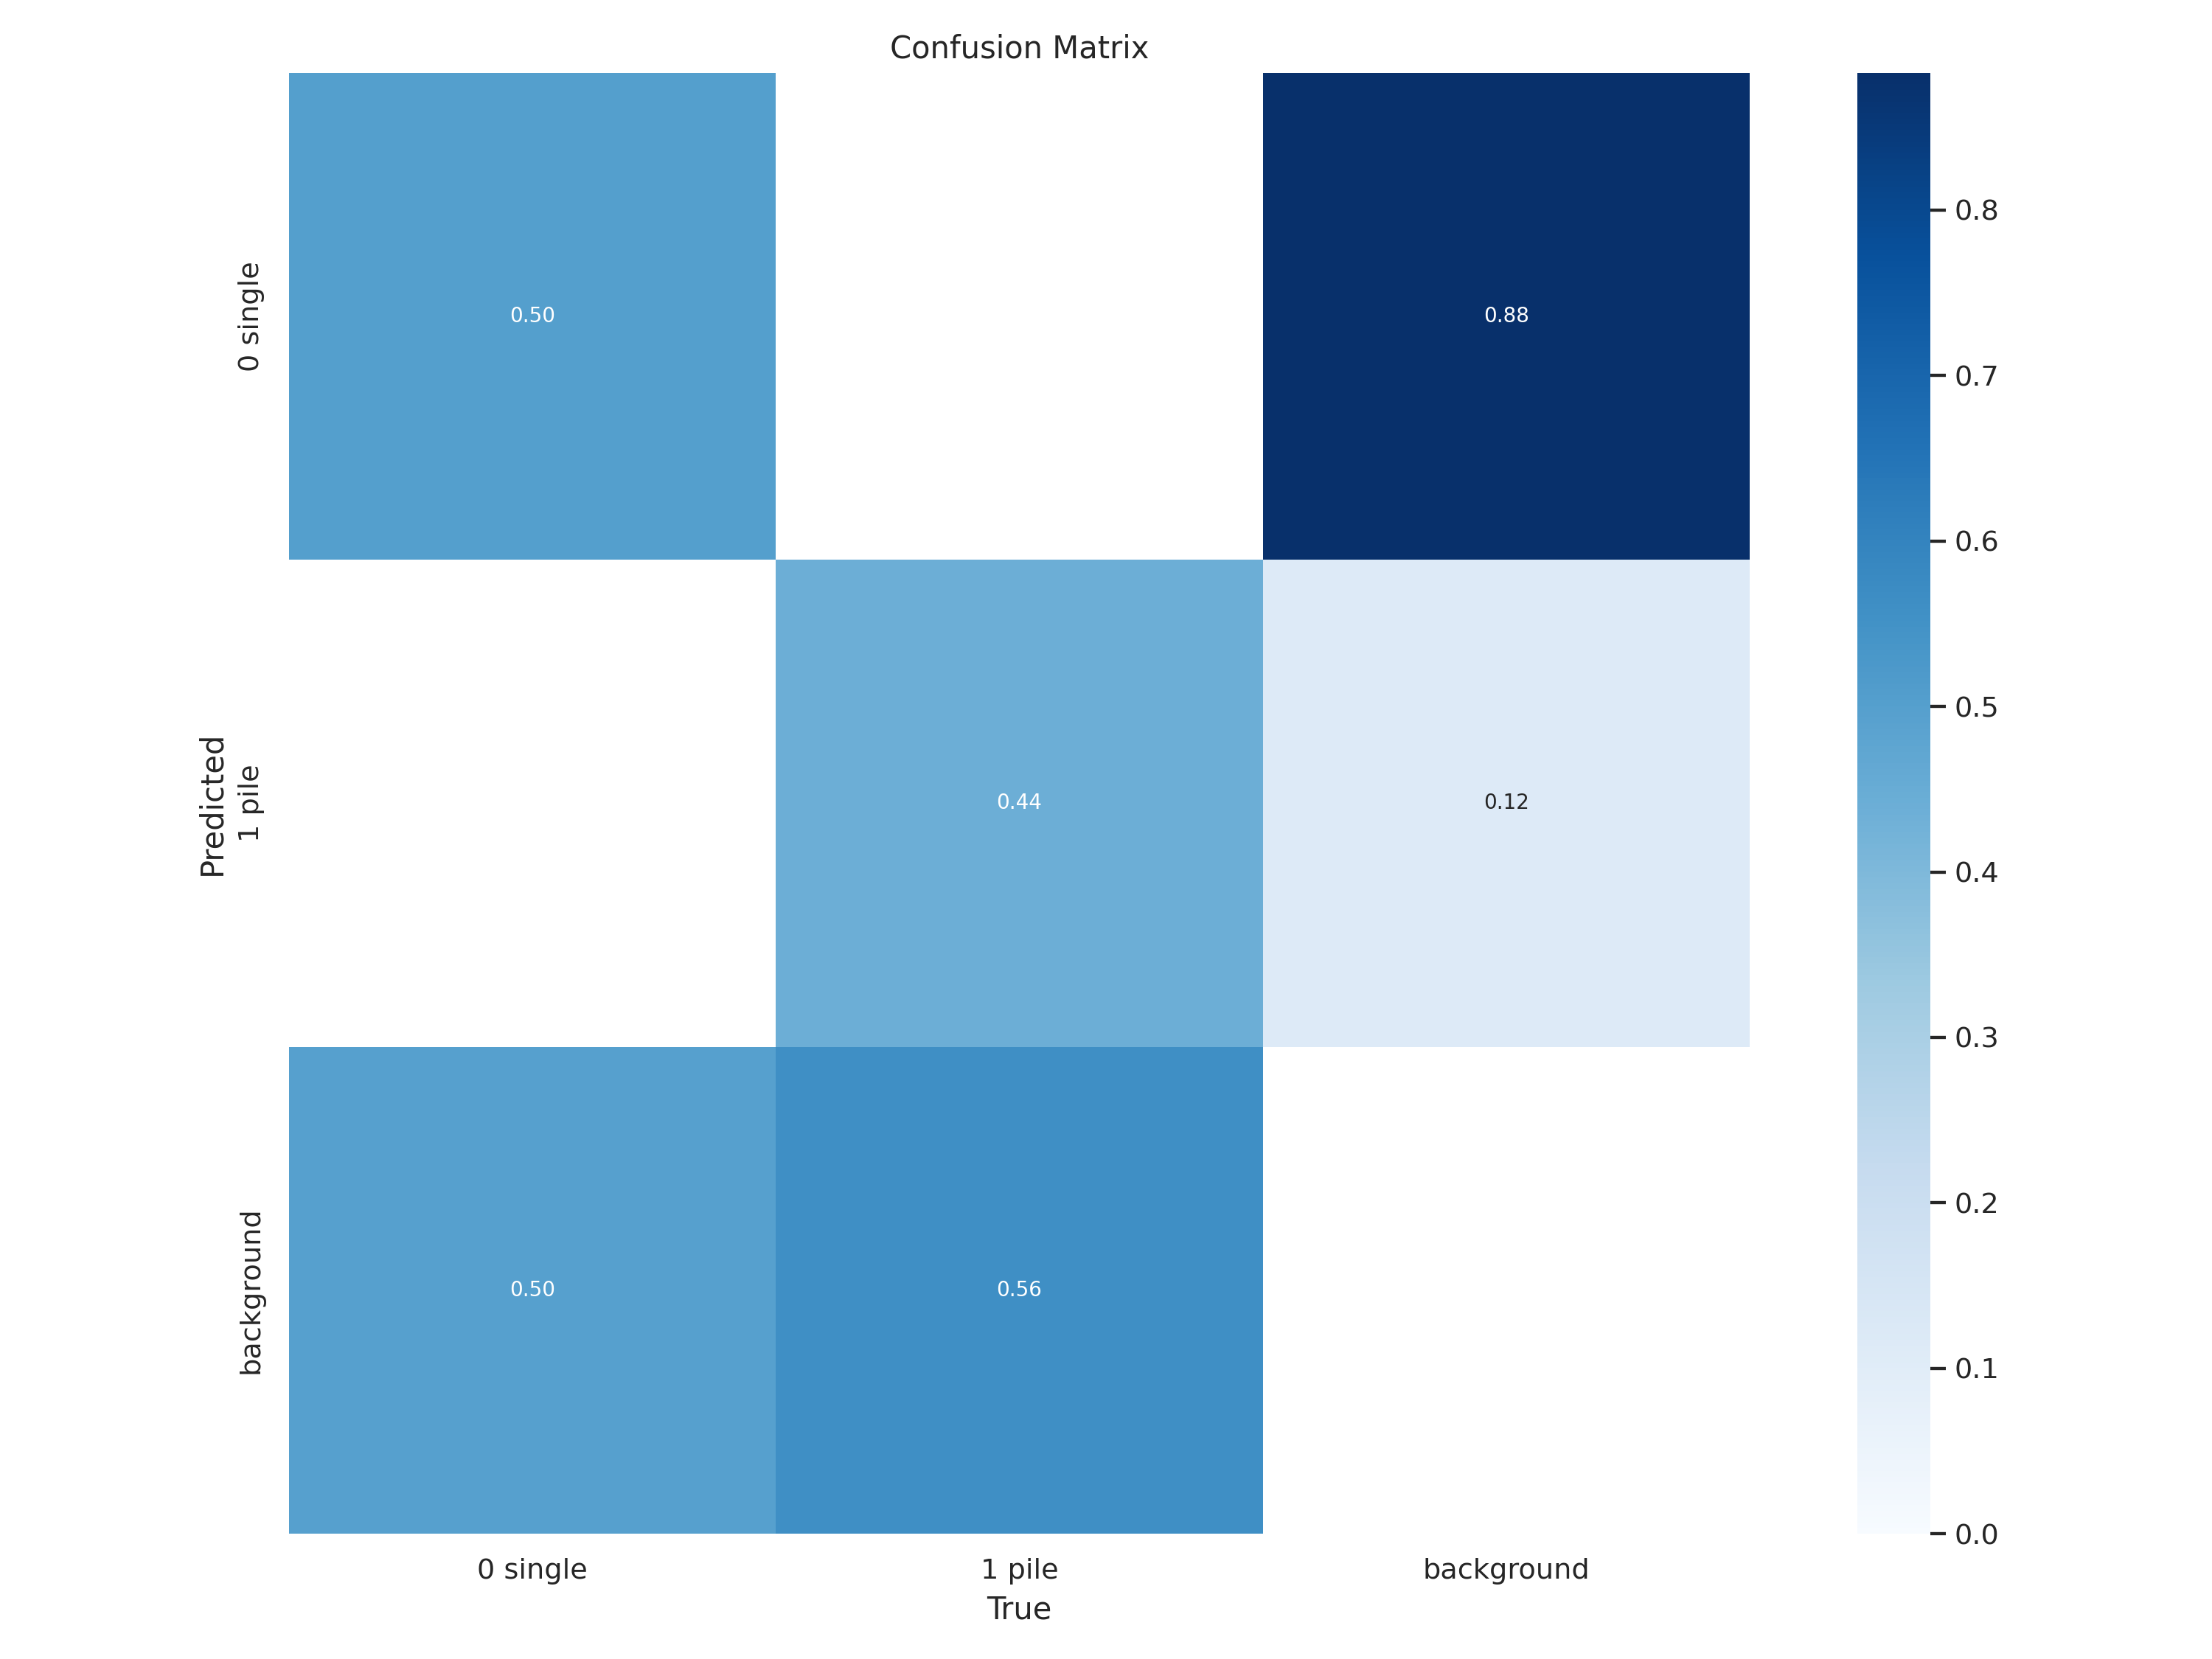

In [10]:
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png')

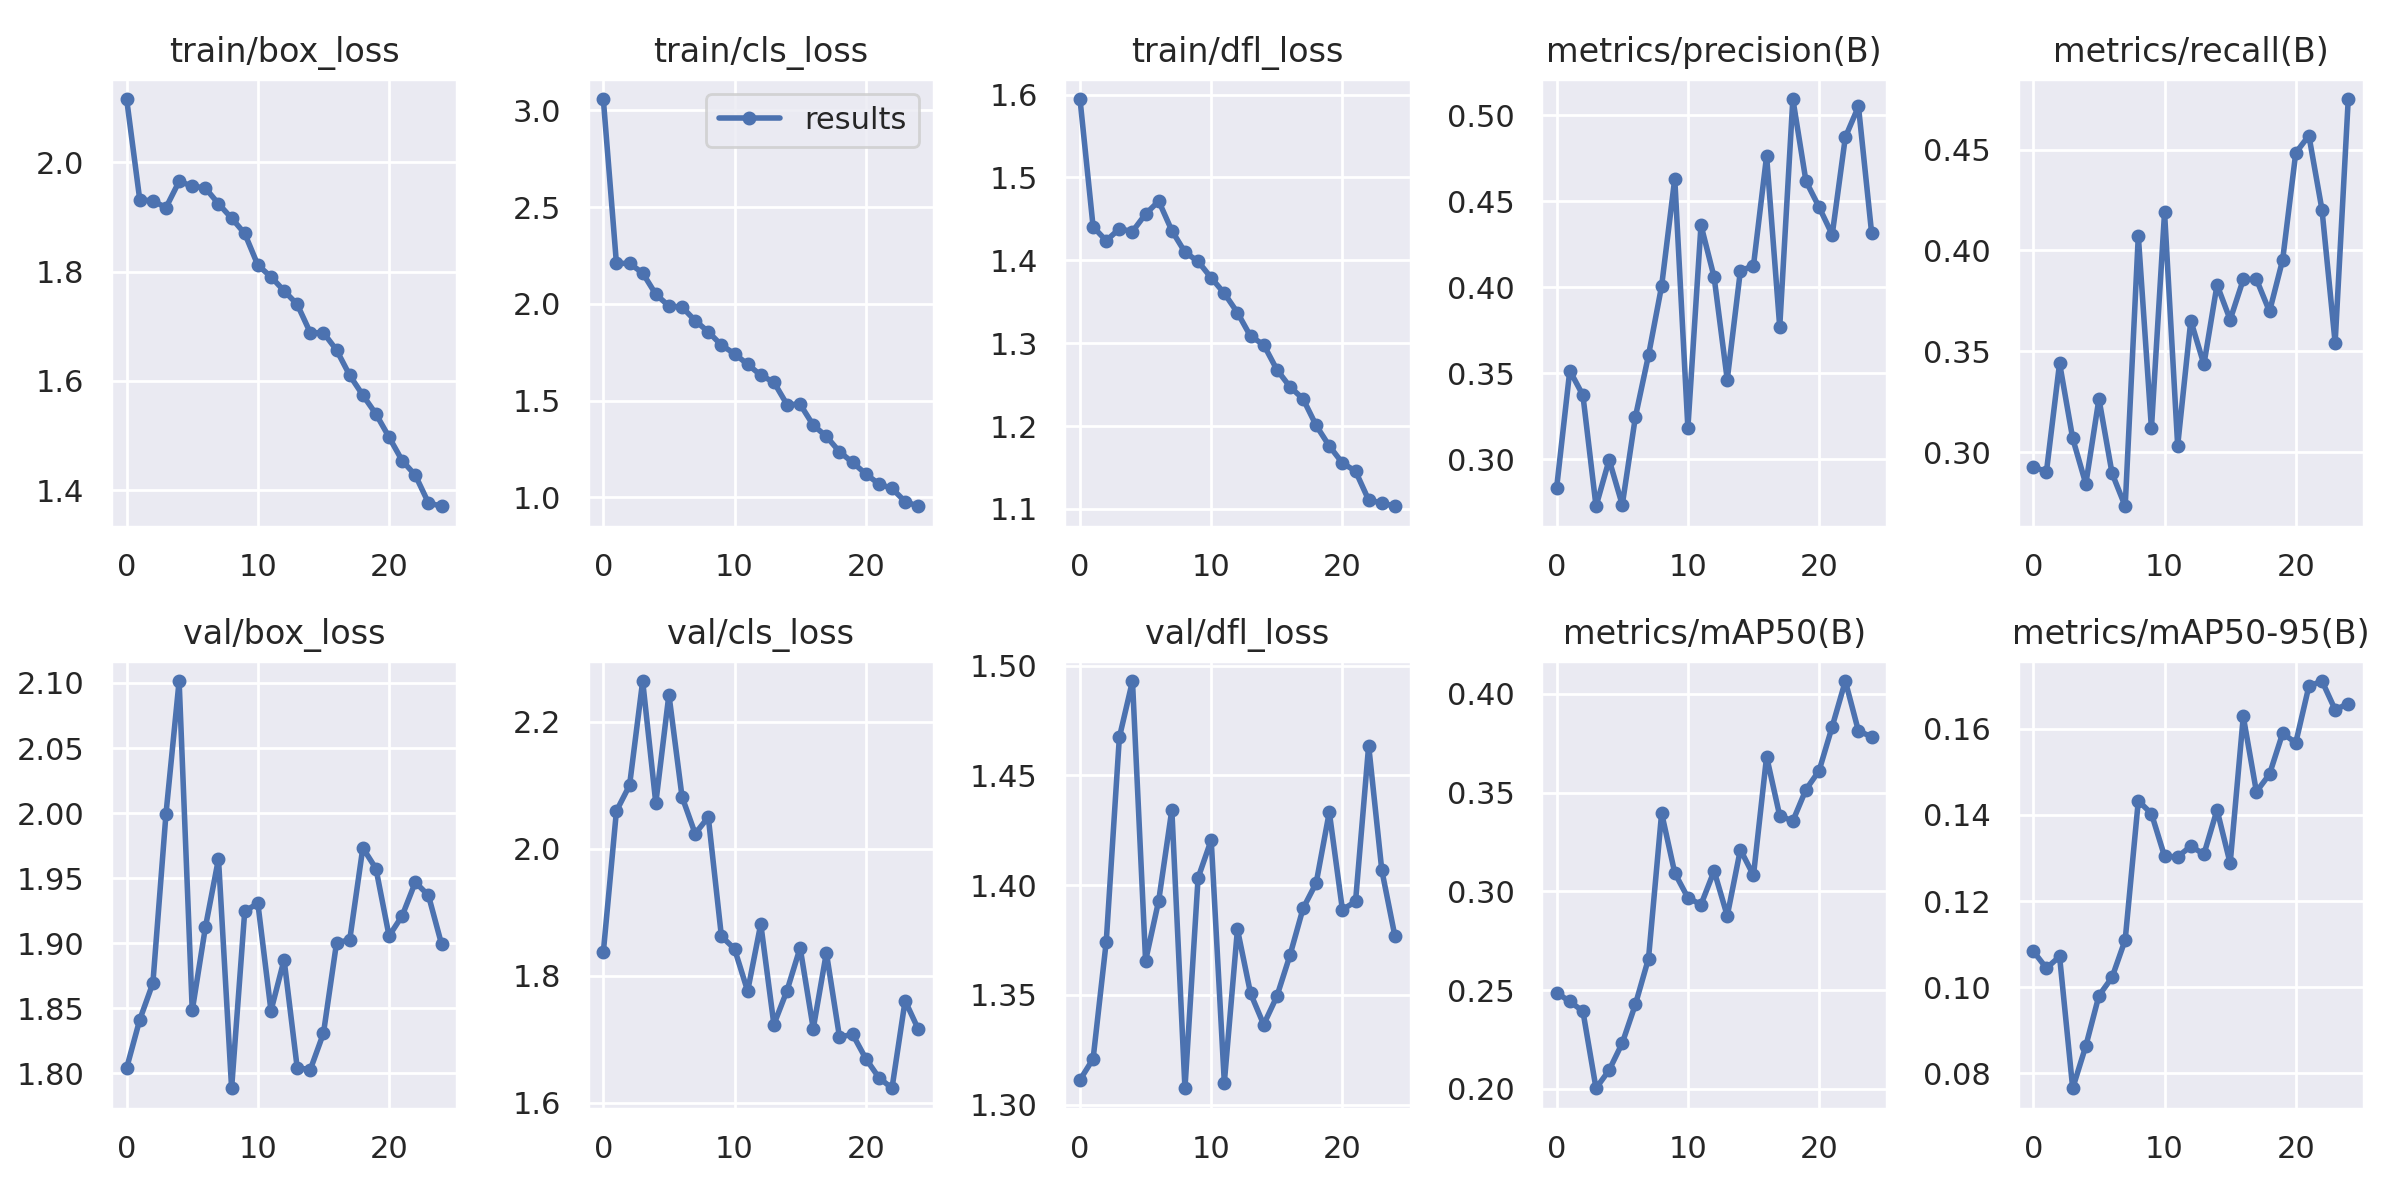

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/results.png')

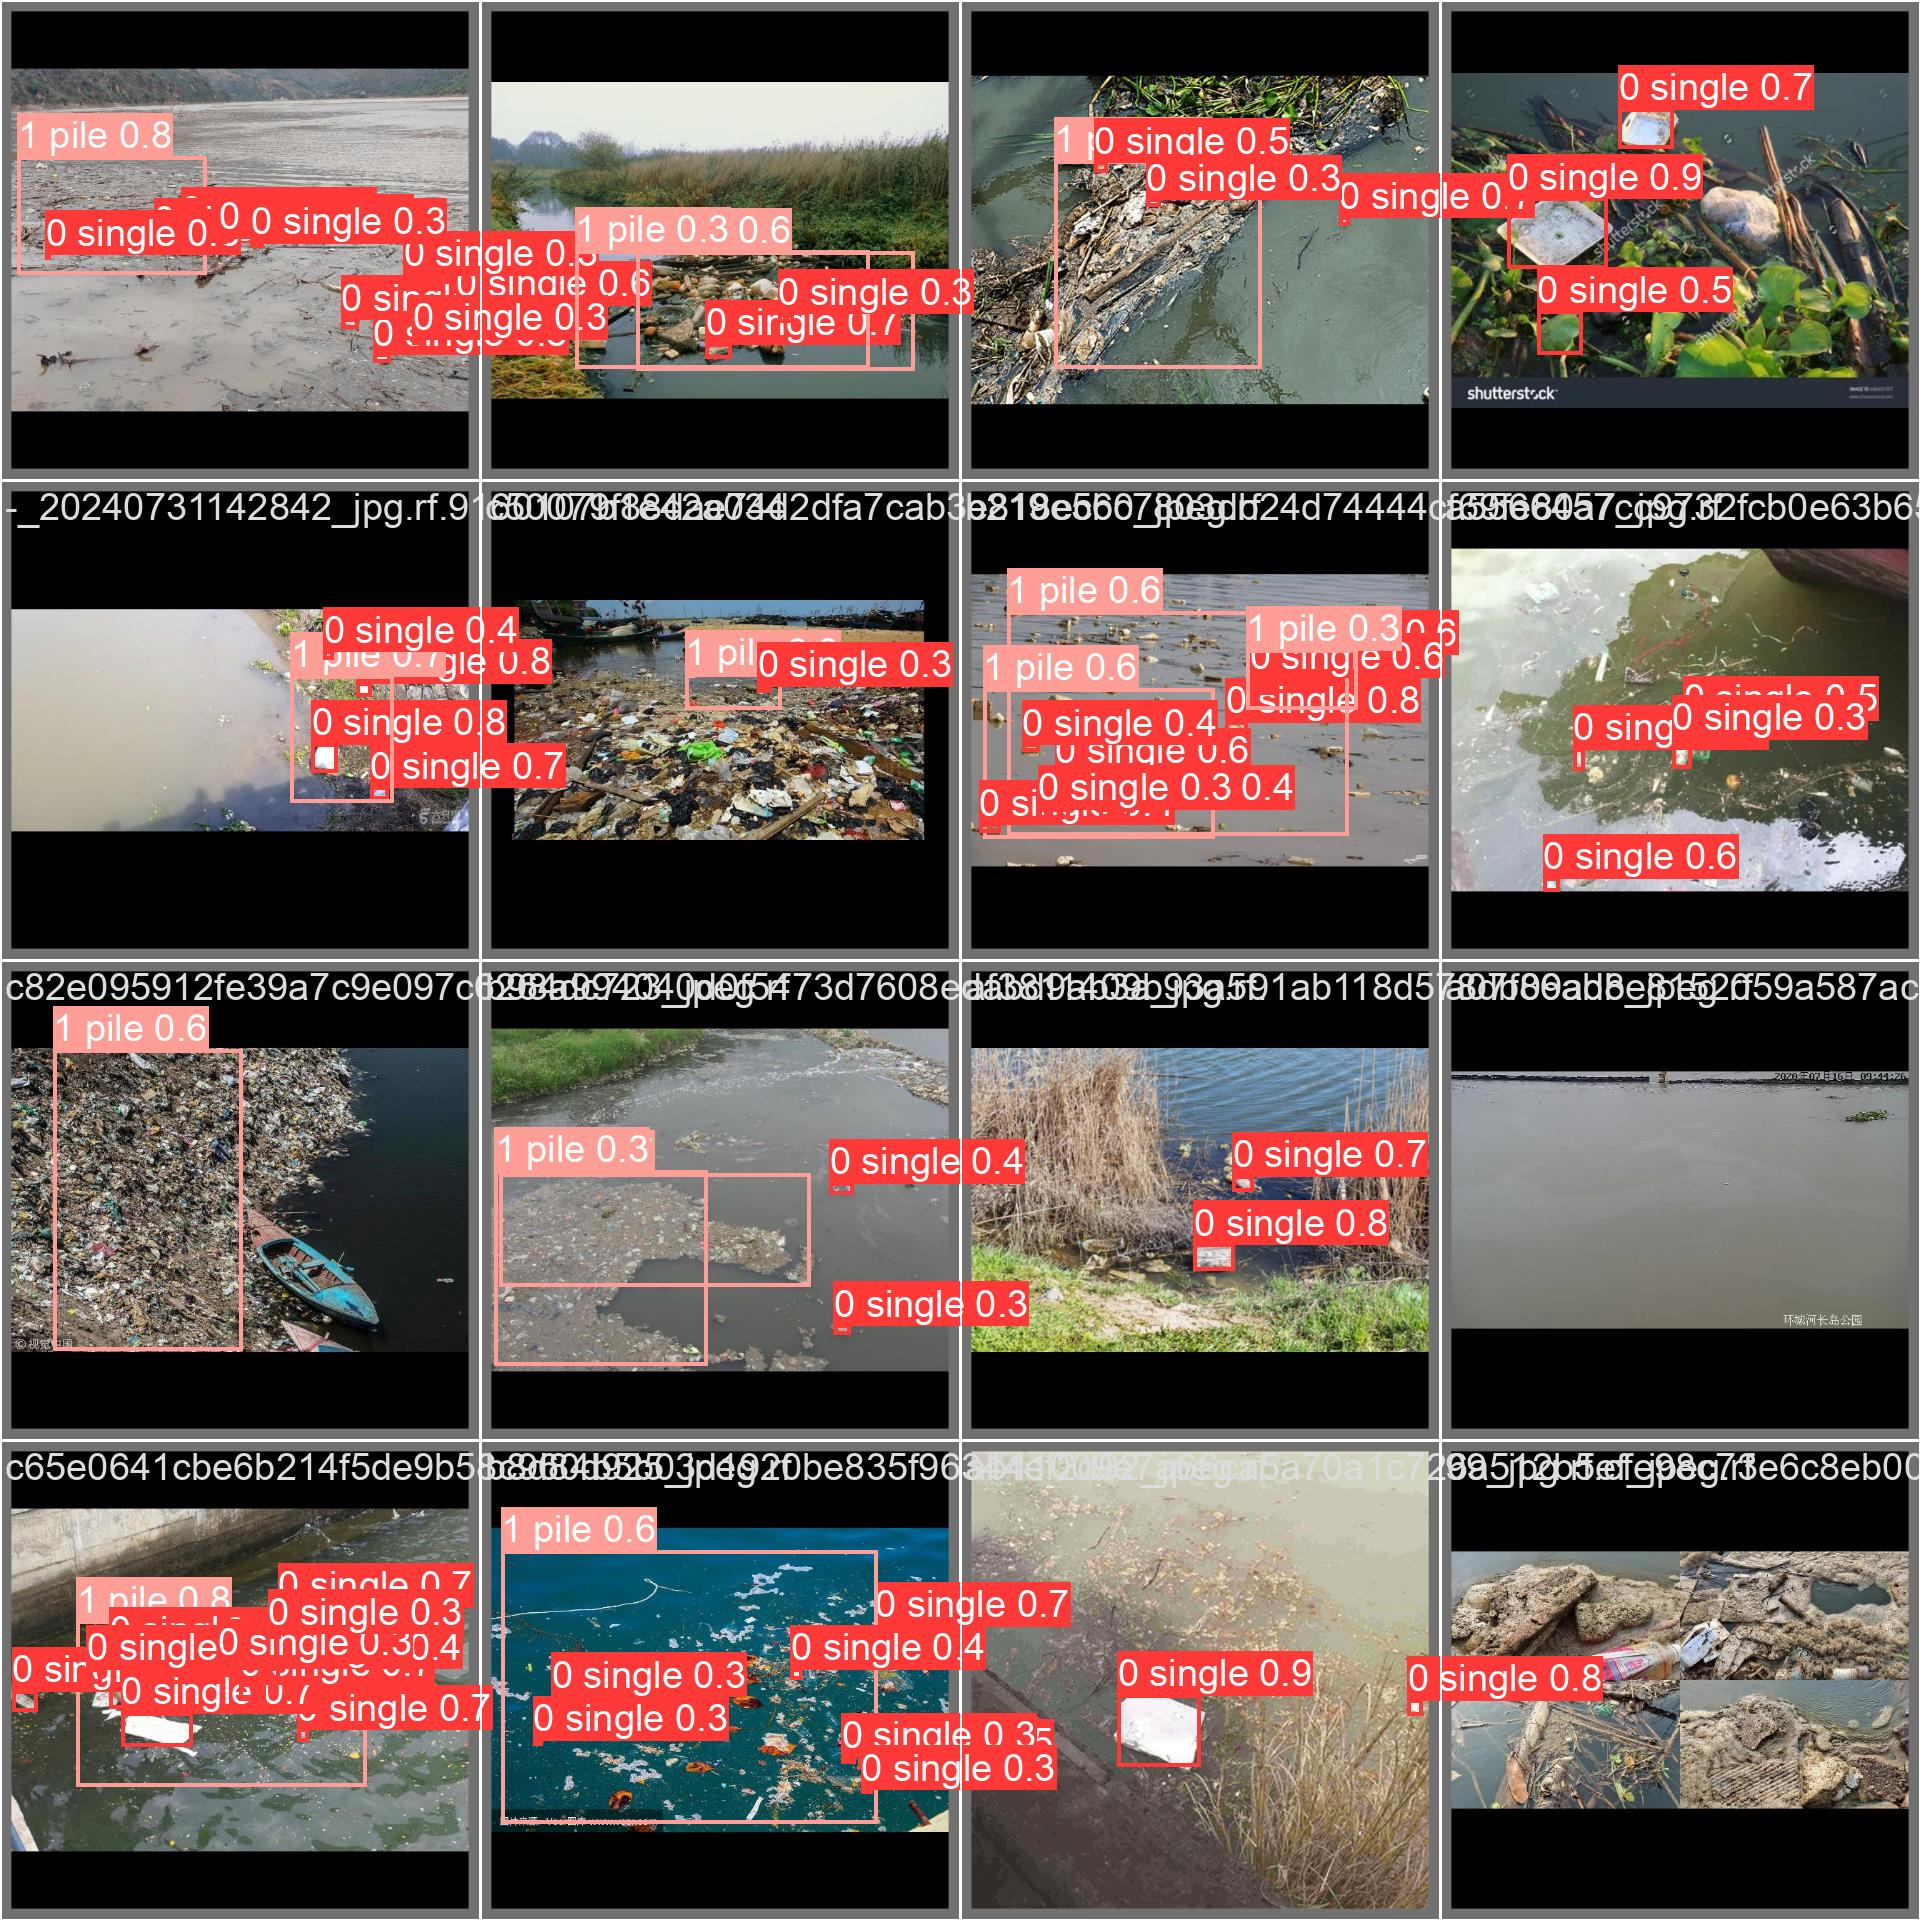

In [11]:
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg')

In [12]:
!yolo task=detect mode=val model='{HOME}/runs/detect/train2/weights/best.pt' data='{DATA_DIR}/data.yaml'

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:336: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load
2024-1

In [15]:
!yolo task=detect mode=predict model='{HOME}/runs/detect/train2/weights/best.pt' conf=0.25 source='{DATA_DIR}/valid/images' save=true

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:336: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load
2024-1

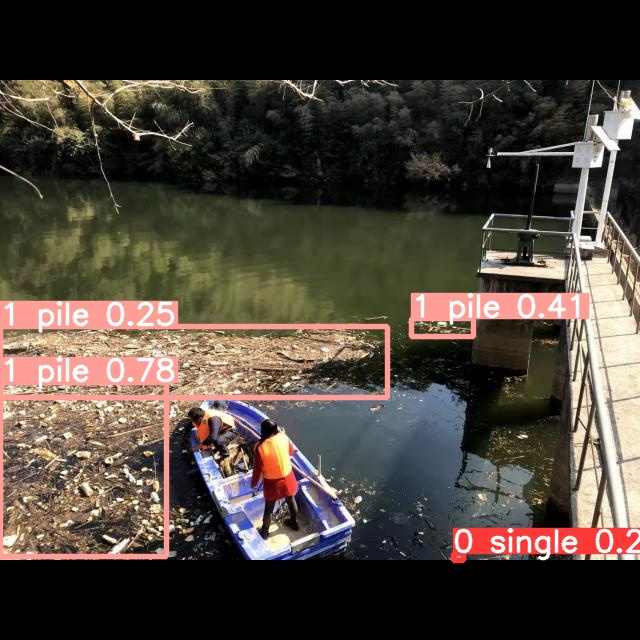

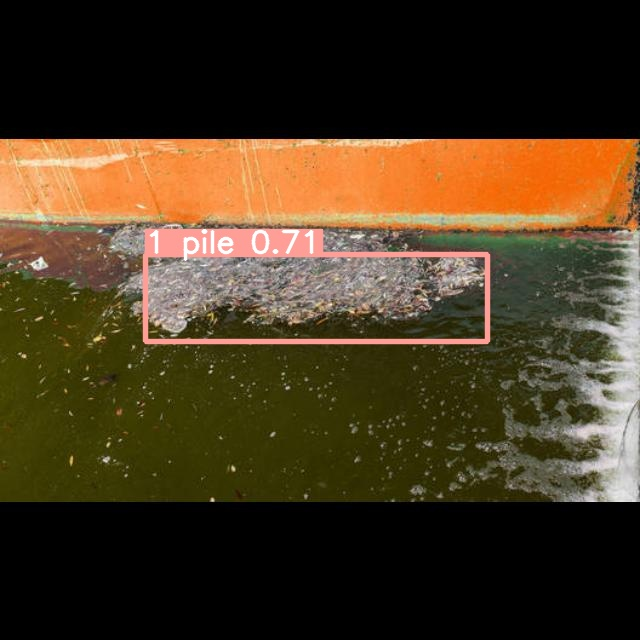

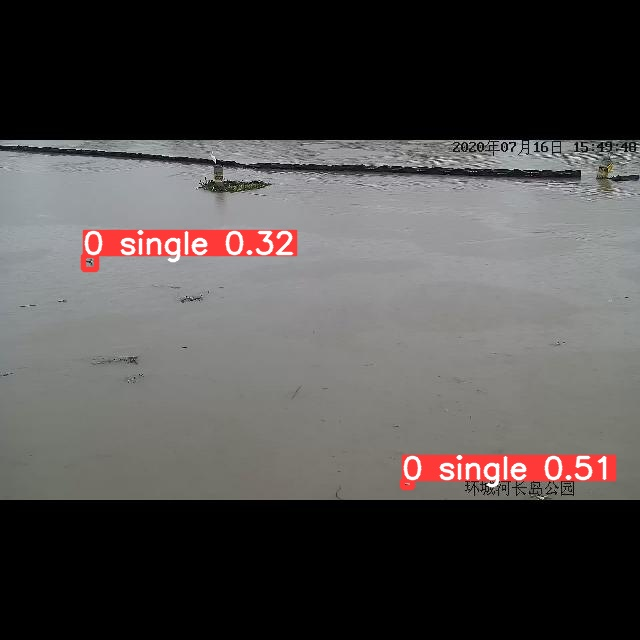

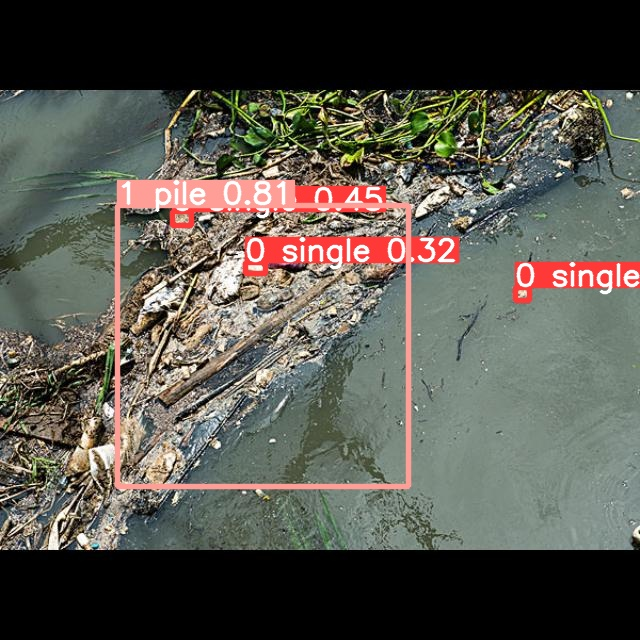

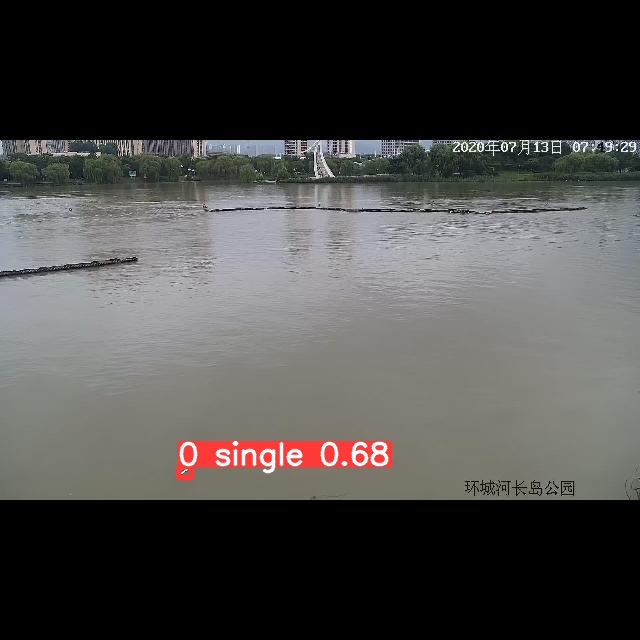

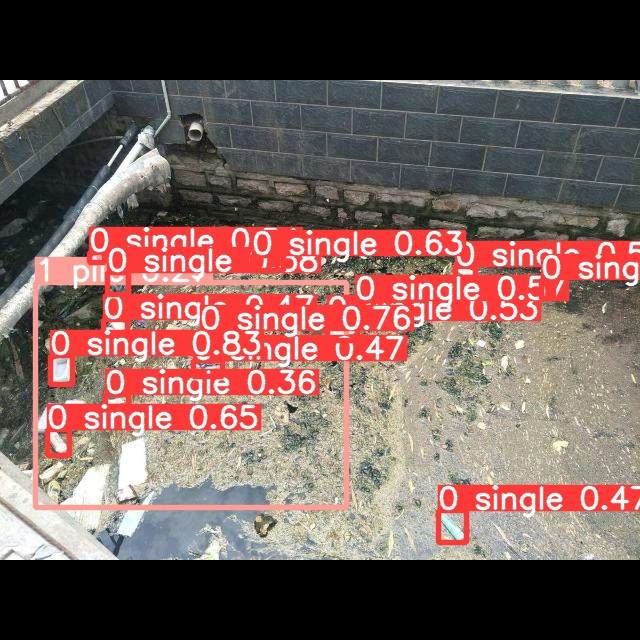

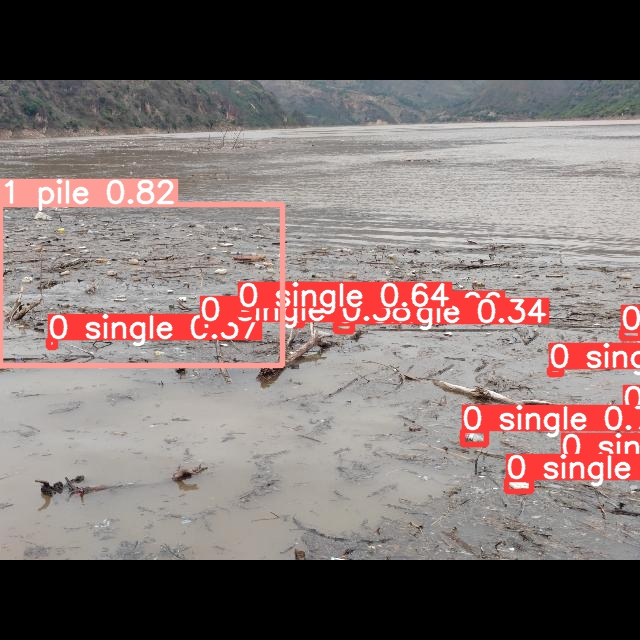

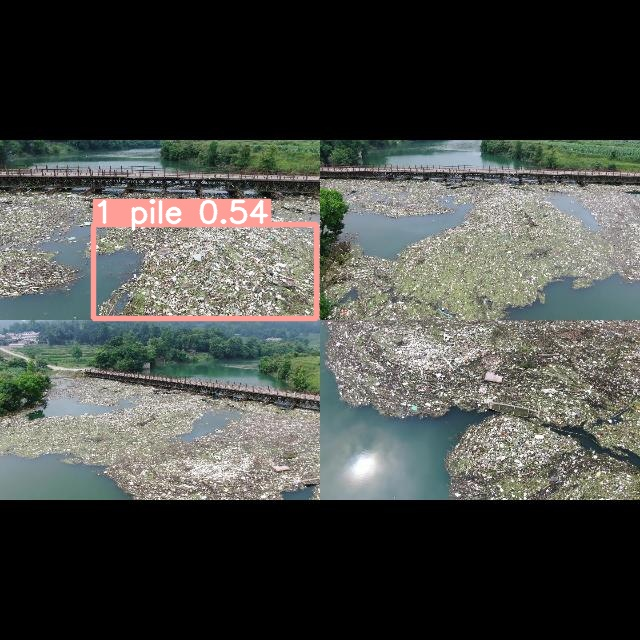

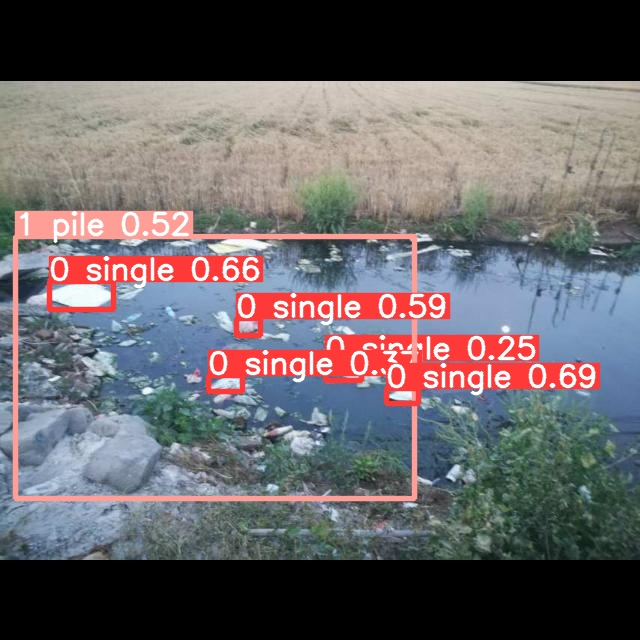

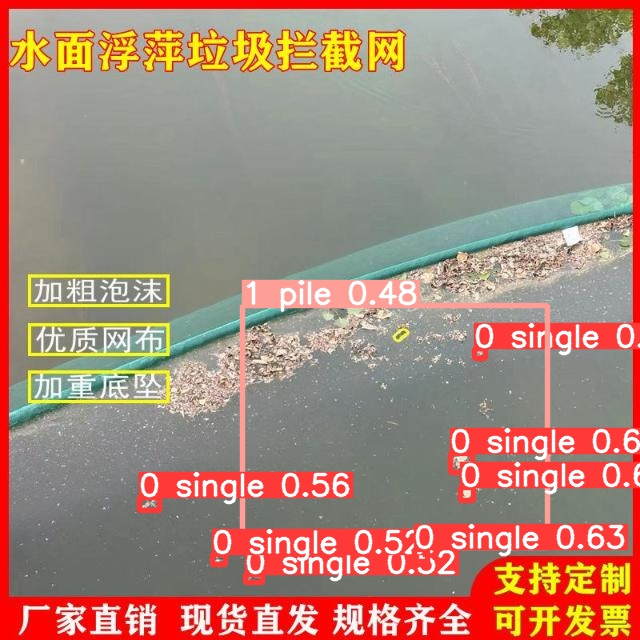

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=600))
  print("\n")